モンテカルロ法を練習しよう！

In [1]:
import numpy as np

①$\sum_{x=1}^{1000}\sum_{y=1}^{1000}xy=250500250000$

In [86]:
Ns= 10000 #サンプル数
x = np.random.randint(1,101, Ns) #1～1000の整数をランダムにNs個生成
y = np.random.randint(1,101, Ns) #1～1000の整数をランダムにNs個生成
print(a:=np.mean(10000*x*y))

25377774.0


②$\int_{-5}^{5}\int_{-5}^{5}(2x^2+y^2) dxdy=2500$

In [21]:
Ns= 10000 #サンプル数
x = np.random.rand(Ns)*10 -5 #-5～5の乱数をNs個生成
y = np.random.rand(Ns)*10 -5 #-5～5の乱数をNs個生成
print(np.mean(100*(2*x*x + y*y)))

2522.9412227417906


③何か問題を作ってみよう！
$\int_{0}^{\pi}\int_{0}^{\pi}sin(xy) dxdy=2.90068$

In [ ]:
Ns = 1000000 #サンプル数
x = np.random.rand(Ns)*np.pi #0～1の乱数をNs個生成
y = np.random.rand(Ns)*np.pi #0～1の乱数をNs個生成
print(np.mean((np.sin(x*y))*np.pi**2))

2.939633612324096


メトロポリス・ヘイスティングス法を用いて正規分布に従うサンプルを生成しよう

In [36]:
import matplotlib.pyplot as plt
import tqdm

(array([ 81.,  95., 109., 116., 100., 107.,  90., 101., 113., 109., 116.,
         93.,  91.,  91.,  88., 107.,  96.,  75.,  92., 109., 114., 100.,
         81.,  86.,  91., 122.,  91., 104.,  96.,  99.,  97.,  96.,  64.,
         89.,  95.,  95.,  92., 106.,  99.,  97.,  94., 106., 111., 106.,
        108.,  92.,  80., 115., 112., 102., 105., 117., 105.,  98.,  91.,
        103., 109.,  81., 102., 112.,  85.,  93.,  96., 120., 110.,  93.,
         94., 120.,  75., 110., 114., 106., 101., 103.,  98.,  94., 102.,
         88.,  82., 106., 103., 105.,  97.,  92., 104., 109., 103.,  87.,
        120.,  83., 101., 105.,  87.,  79.,  92., 103.,  99.,  95., 102.,
         88.,  95., 102., 110., 117.,  95., 108., 103.,  99.,  94.,  97.,
         92., 106., 108., 109.,  99., 120., 129., 126., 115.,  97.,  93.,
        113.,  96., 109.,  99., 103.,  96.,  88., 109.,  99.,  89.,  98.,
        106., 102.,  92.,  95.,  98., 112., 111.,  84., 109., 104., 106.,
        119., 127., 102.,  99.,  82., 

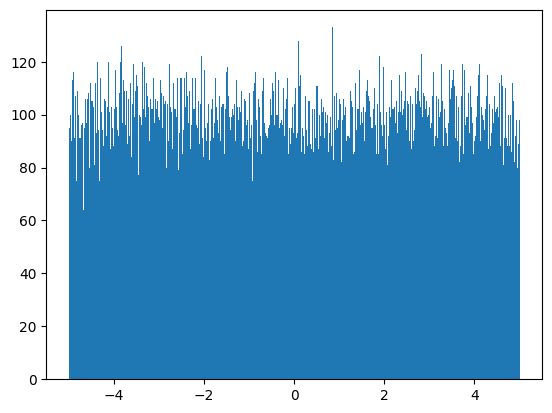

In [ ]:
NSAMPLE = 100000
x_org = np.random.rand(NSAMPLE)*10-5 #初期サンプル(-5～5の乱数をNSAMPLE個生成)
plt.hist(x_org,bins=1000)

In [38]:
def cal_normal(x):
  y = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*x*x)
  return y

In [41]:
for i in tqdm.tqdm(range(100000)):
  x_tmp = np.random.rand(NSAMPLE)*10-5 #新しいサンプルの提案
  P_org = cal_normal(x_org) #現在のサンプルの確率
  P_tmp = cal_normal(x_tmp) #新しいサンプルの確率
  r = np.random.rand(NSAMPLE) #0～1の乱数
  update = (r < P_tmp/P_org)
  x_org = update * x_tmp + ~update * x_org

100%|██████████| 100000/100000 [16:32<00:00, 100.80it/s]


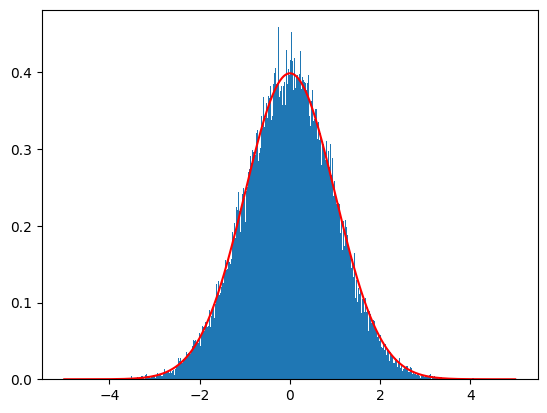

In [52]:
a,b,_ = plt.hist(x_org,bins=1000)
plt.close()
c = a/((b[1]-b[0])*NSAMPLE)
plt.bar(x=b[:-1], height=c, width=b[1]-b[0], align="edge")
x = np.arange(-5, 5, 0.01)
normal = cal_normal(x)
plt.plot(x,normal,color = "red")